# Hackathon Context :

The data is related to direct marketing campaigns of a financial institution.The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was
required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no')
subscribed. You will have to analyze the dataset in order to find ways to look for future
strategies in order to improve future marketing campaigns for the bank.


# Attribute Information:

# Input variables:

1. age 
2. job
3. marital
4. education
5. default
6. balance
7. housing
8. loan

# related with the last contact of the current campaign:

9. contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. duration: last contact duration, in seconds (numeric)

# other attributes:

13. campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')Output variable (desired target):
17. deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [8]:
train=pd.read_csv(r"E:\Machine Learning Projects\data.csv")
test=pd.read_csv(r"E:\Machine Learning Projects\test_data.csv")


In [6]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [9]:
# Lengths of datasets
train_len=len(train)
test_len=len(test)

In [10]:
numerical=train.select_dtypes(exclude=['object'])
categorical=train.select_dtypes(include=['object'])

In [11]:
categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,technician,married,tertiary,no,yes,no,cellular,oct,success,no
1,housemaid,married,primary,no,no,no,cellular,aug,unknown,no
2,management,single,tertiary,no,yes,no,cellular,may,failure,yes
3,blue-collar,married,primary,no,yes,no,cellular,may,unknown,no
4,services,married,secondary,no,yes,yes,cellular,jan,failure,no


In [12]:
le=preprocessing.LabelEncoder()
le_categorical=categorical.apply(le.fit_transform)
le_categorical.head()


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,9,1,2,0,1,0,0,10,2,0
1,3,1,0,0,0,0,0,1,3,0
2,4,2,2,0,1,0,0,8,0,1
3,1,1,0,0,1,0,0,8,3,0
4,7,1,1,0,1,1,0,4,0,0


In [13]:
df=pd.concat([numerical,le_categorical],axis=1)
df.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,38,127,14,113,1,50,2,9,1,2,0,1,0,0,10,2,0
1,41,365,8,203,5,-1,0,3,1,0,0,0,0,0,1,3,0
2,39,2454,4,716,3,263,2,4,2,2,0,1,0,0,8,0,1
3,49,6215,11,549,1,-1,0,1,1,0,0,1,0,0,8,3,0
4,37,1694,29,404,2,251,6,7,1,1,0,1,1,0,4,0,0


In [14]:
print(len(df))

8371


In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
x

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,38,127,14,113,1,50,2,9,1,2,0,1,0,0,10,2
1,41,365,8,203,5,-1,0,3,1,0,0,0,0,0,1,3
2,39,2454,4,716,3,263,2,4,2,2,0,1,0,0,8,0
3,49,6215,11,549,1,-1,0,1,1,0,0,1,0,0,8,3
4,37,1694,29,404,2,251,6,7,1,1,0,1,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,52,388,25,272,1,-1,0,4,1,2,0,0,0,0,8,3
8367,39,2758,4,658,3,-1,0,7,1,1,0,0,0,0,3,3
8368,38,178,20,245,1,-1,0,1,1,0,0,1,0,2,8,3
8369,59,-49,13,248,2,-1,0,5,0,3,0,1,0,2,8,3


In [28]:
y

0       0
1       0
2       1
3       0
4       0
       ..
8366    1
8367    1
8368    0
8369    0
8370    1
Name: deposit, Length: 8371, dtype: int32

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
lr=LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [31]:
lr.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
len(y_pred)

1675

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[712, 187],
       [245, 531]], dtype=int64)

In [35]:
acc=(712+531)/(712+187+245+531)
acc*100

74.20895522388061

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))


Decision Tree Test Accuracy 75.16%


In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 84.36%


In [56]:
y_pred=rf.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [57]:
print(len(y_pred))

1675


In [58]:
x_test.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
5980,71,3561,15,577,7,-1,0,5,1,2,0,0,0,1,7,3
7334,29,544,13,360,1,-1,0,9,2,1,0,1,0,2,8,3
852,77,300,9,511,1,-1,0,5,2,0,0,0,0,0,11,3
6971,35,484,8,344,1,87,3,1,2,3,0,0,0,0,5,0
140,25,184,11,437,7,-1,0,0,2,1,0,0,1,1,5,3


In [59]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown


In [60]:
numerical=test.select_dtypes(exclude=['object'])
categorical=test.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,blue-collar,single,secondary,yes,no,no,cellular,nov,failure
1,blue-collar,married,primary,no,no,no,cellular,jul,unknown
2,self-employed,single,tertiary,no,no,yes,cellular,may,unknown
3,technician,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,secondary,no,yes,no,telephone,may,unknown


In [61]:
le=preprocessing.LabelEncoder()
le_categorical=categorical.apply(le.fit_transform)
le_categorical.head()


,job,marital,education,default,housing,loan,contact,month,poutcome
0,1,2,1,1,0,0,0,9,0
1,1,1,0,0,0,0,0,5,3
2,6,2,2,0,0,1,0,8,3
3,9,1,1,0,1,0,2,8,3
4,0,1,1,0,1,0,1,8,3


In [63]:
test=pd.concat([numerical,le_categorical],axis=1)
test.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,31,477,20,426,2,189,6,1,2,1,1,0,0,0,9,0
1,49,599,23,464,1,-1,0,1,1,0,0,0,0,0,5,3
2,51,400,27,200,1,-1,0,6,2,2,0,0,1,0,8,3
3,33,488,8,703,1,-1,0,9,1,1,0,1,0,2,8,3
4,34,40,5,125,2,-1,0,0,1,1,0,1,0,1,8,3


In [73]:
y_pred=rf.predict(test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [65]:
print(len(y_pred))

2791


In [66]:
submission= pd.DataFrame()
submission['deposit']=y_pred
submission.head()

,deposit
0,1
1,1
2,0
3,1
4,0


In [68]:
submission.to_csv('result4.csv',index=False)

In [75]:
a=str(1)
print(type(a))

<class 'str'>


In [17]:
df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,38,127,14,113,1,50,2,9,1,2,0,1,0,0,10,2,0
1,41,365,8,203,5,-1,0,3,1,0,0,0,0,0,1,3,0
2,39,2454,4,716,3,263,2,4,2,2,0,1,0,0,8,0,1
3,49,6215,11,549,1,-1,0,1,1,0,0,1,0,0,8,3,0
4,37,1694,29,404,2,251,6,7,1,1,0,1,1,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,52,388,25,272,1,-1,0,4,1,2,0,0,0,0,8,3,1
8367,39,2758,4,658,3,-1,0,7,1,1,0,0,0,0,3,3,1
8368,38,178,20,245,1,-1,0,1,1,0,0,1,0,2,8,3,0
8369,59,-49,13,248,2,-1,0,5,0,3,0,1,0,2,8,3,0


<AxesSubplot:>

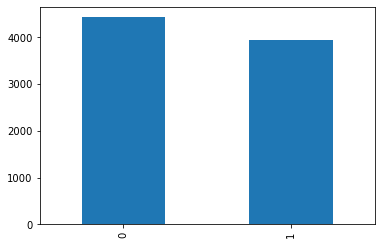

In [19]:

count=df['deposit'].value_counts()

count.plot(kind="bar")

In [20]:
count

0    4428
1    3943
Name: deposit, dtype: int64